In [6]:
# Load in packages and data
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from typing import Tuple, List, Dict, Optional

from pathlib import Path

cwd = Path.cwd()

ll_df_cph = pd.read_csv(cwd / 'll_data' / 'll_cph.csv', low_memory=False)
ll_df_aarhus = pd.read_csv(cwd / 'll_data' / 'll_aarhus.csv', low_memory=False)
ll_df_odense = pd.read_csv(cwd / 'll_data' / 'll_odense.csv', low_memory=False)

df_list = [ll_df_cph, ll_df_aarhus, ll_df_odense]
county_names = ['københavn', 'århus', 'odense']

print(ll_df_cph.head())

print(ll_df_cph.columns)

print(ll_df_cph.dtypes)

    pa_id sex marital_status  event_year                            name_cl  \
0  325808   m           gift        1845          peter nielsen svendalhuus   
1  325809   f           gift        1845                      marie nielsen   
2  325810   f          ugift        1845       henriette sophie christensen   
3  271659   f            NaN        1845  hansine charlotte augusta nielsen   
4  271660   m            NaN        1845    carl frederik christian nielsen   

    age event_parish event_county          household_id household_position  \
0  44.0          NaN    københavn  50347_1845_københavn                NaN   
1  43.0          NaN    københavn  50347_1845_københavn               kone   
2  37.0          NaN    københavn  50347_1845_københavn                NaN   
3  10.0          NaN    københavn  50347_1845_københavn               barn   
4   8.0          NaN    københavn  50347_1845_københavn               barn   

   role  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   Na


Population Growth Summary for Copenhagen:
--------------------------------------------------
Period: 1787 to 1901
Total population growth: 373.7%
Initial population (1787): 112,320
Final population (1901): 532,088


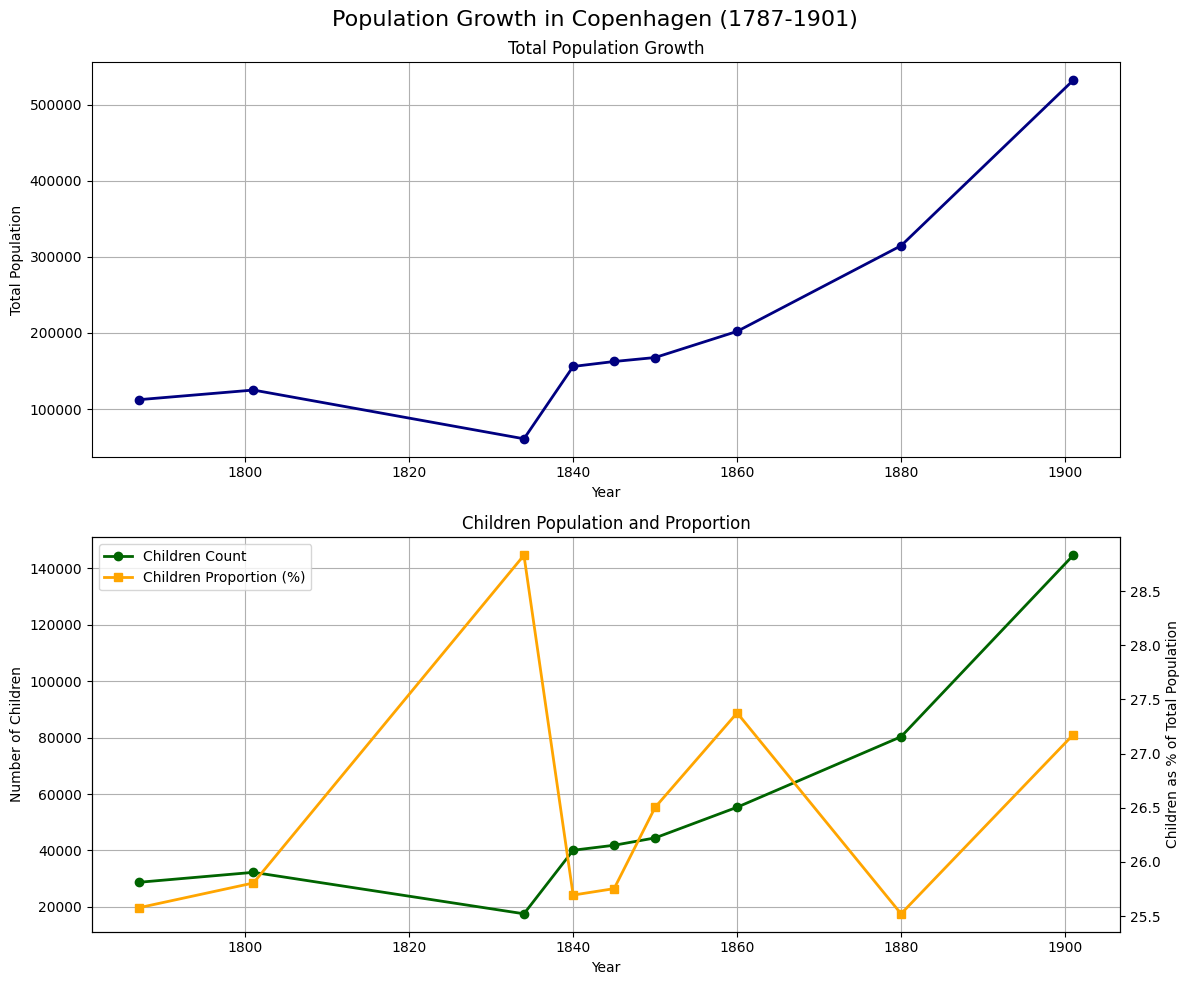

In [7]:
from typing import Tuple, List, Dict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

def prepare_population_data(df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Prepare two dataframes: one for total population counts per year,
    and one for children counts per year.
    
    Args:
        df: DataFrame containing the Copenhagen census data
        
    Returns:
        Tuple containing:
        - DataFrame with yearly population counts
        - DataFrame with yearly children counts
    """
    # Create yearly population counts
    yearly_population = df.groupby('event_year').size().reset_index(name='total_population')
    
    # Count children (using age < 15 as definition)
    children_mask = df['age'] < 15
    yearly_children = (df[children_mask].groupby('event_year')
                      .size()
                      .reset_index(name='children_count'))
    
    return yearly_population, yearly_children

def visualize_population_growth(
    population_df: pd.DataFrame,
    children_df: pd.DataFrame
) -> Tuple[plt.Figure, plt.Axes]:
    """
    Create two subplots:
    1. Total population growth over time
    2. Children population and their proportion of total population
    
    Args:
        population_df: DataFrame with yearly population counts
        children_df: DataFrame with yearly children counts
        
    Returns:
        Tuple containing:
        - Figure object
        - Array of Axes objects
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    fig.suptitle('Population Growth in Copenhagen (1787-1901)', fontsize=16)
    
    # Plot 1: Total Population Growth
    ax1.plot(population_df['event_year'], 
            population_df['total_population'],
            marker='o',
            color='navy',
            linewidth=2)
    ax1.set_title('Total Population Growth')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Total Population')
    ax1.grid(True)
    
    # Plot 2: Children Population and Proportion
    merged_data = population_df.merge(children_df, on='event_year')
    merged_data['children_proportion'] = (merged_data['children_count'] / 
                                        merged_data['total_population'] * 100)
    
    # Create twin axes for showing both absolute numbers and percentages
    ax2_twin = ax2.twinx()
    
    # Plot children count
    line1 = ax2.plot(merged_data['event_year'],
                     merged_data['children_count'],
                     color='darkgreen',
                     marker='o',
                     linewidth=2,
                     label='Children Count')
    
    # Plot children proportion
    line2 = ax2_twin.plot(merged_data['event_year'],
                         merged_data['children_proportion'],
                         color='orange',
                         marker='s',
                         linewidth=2,
                         label='Children Proportion (%)')
    
    # Combine legends
    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax2.legend(lines, labels, loc='upper left')
    
    ax2.set_title('Children Population and Proportion')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Number of Children')
    ax2_twin.set_ylabel('Children as % of Total Population')
    ax2.grid(True)
    
    plt.tight_layout()
    return fig, (ax1, ax2)

# Process the Copenhagen data
copenhagen_df = ll_df_cph.copy()
population_data, children_data = prepare_population_data(copenhagen_df)

# Create the visualizations
fig, axes = visualize_population_growth(population_data, children_data)

# Add some summary statistics
print("\nPopulation Growth Summary for Copenhagen:")
print("-" * 50)
first_year = population_data['event_year'].min()
last_year = population_data['event_year'].max()
total_growth = (population_data.iloc[-1]['total_population'] / 
                population_data.iloc[0]['total_population'] - 1) * 100

print(f"Period: {first_year} to {last_year}")
print(f"Total population growth: {total_growth:.1f}%")
print(f"Initial population (1787): {population_data.iloc[0]['total_population']:,}")
print(f"Final population (1901): {population_data.iloc[-1]['total_population']:,}")

# Show the plots
plt.show()

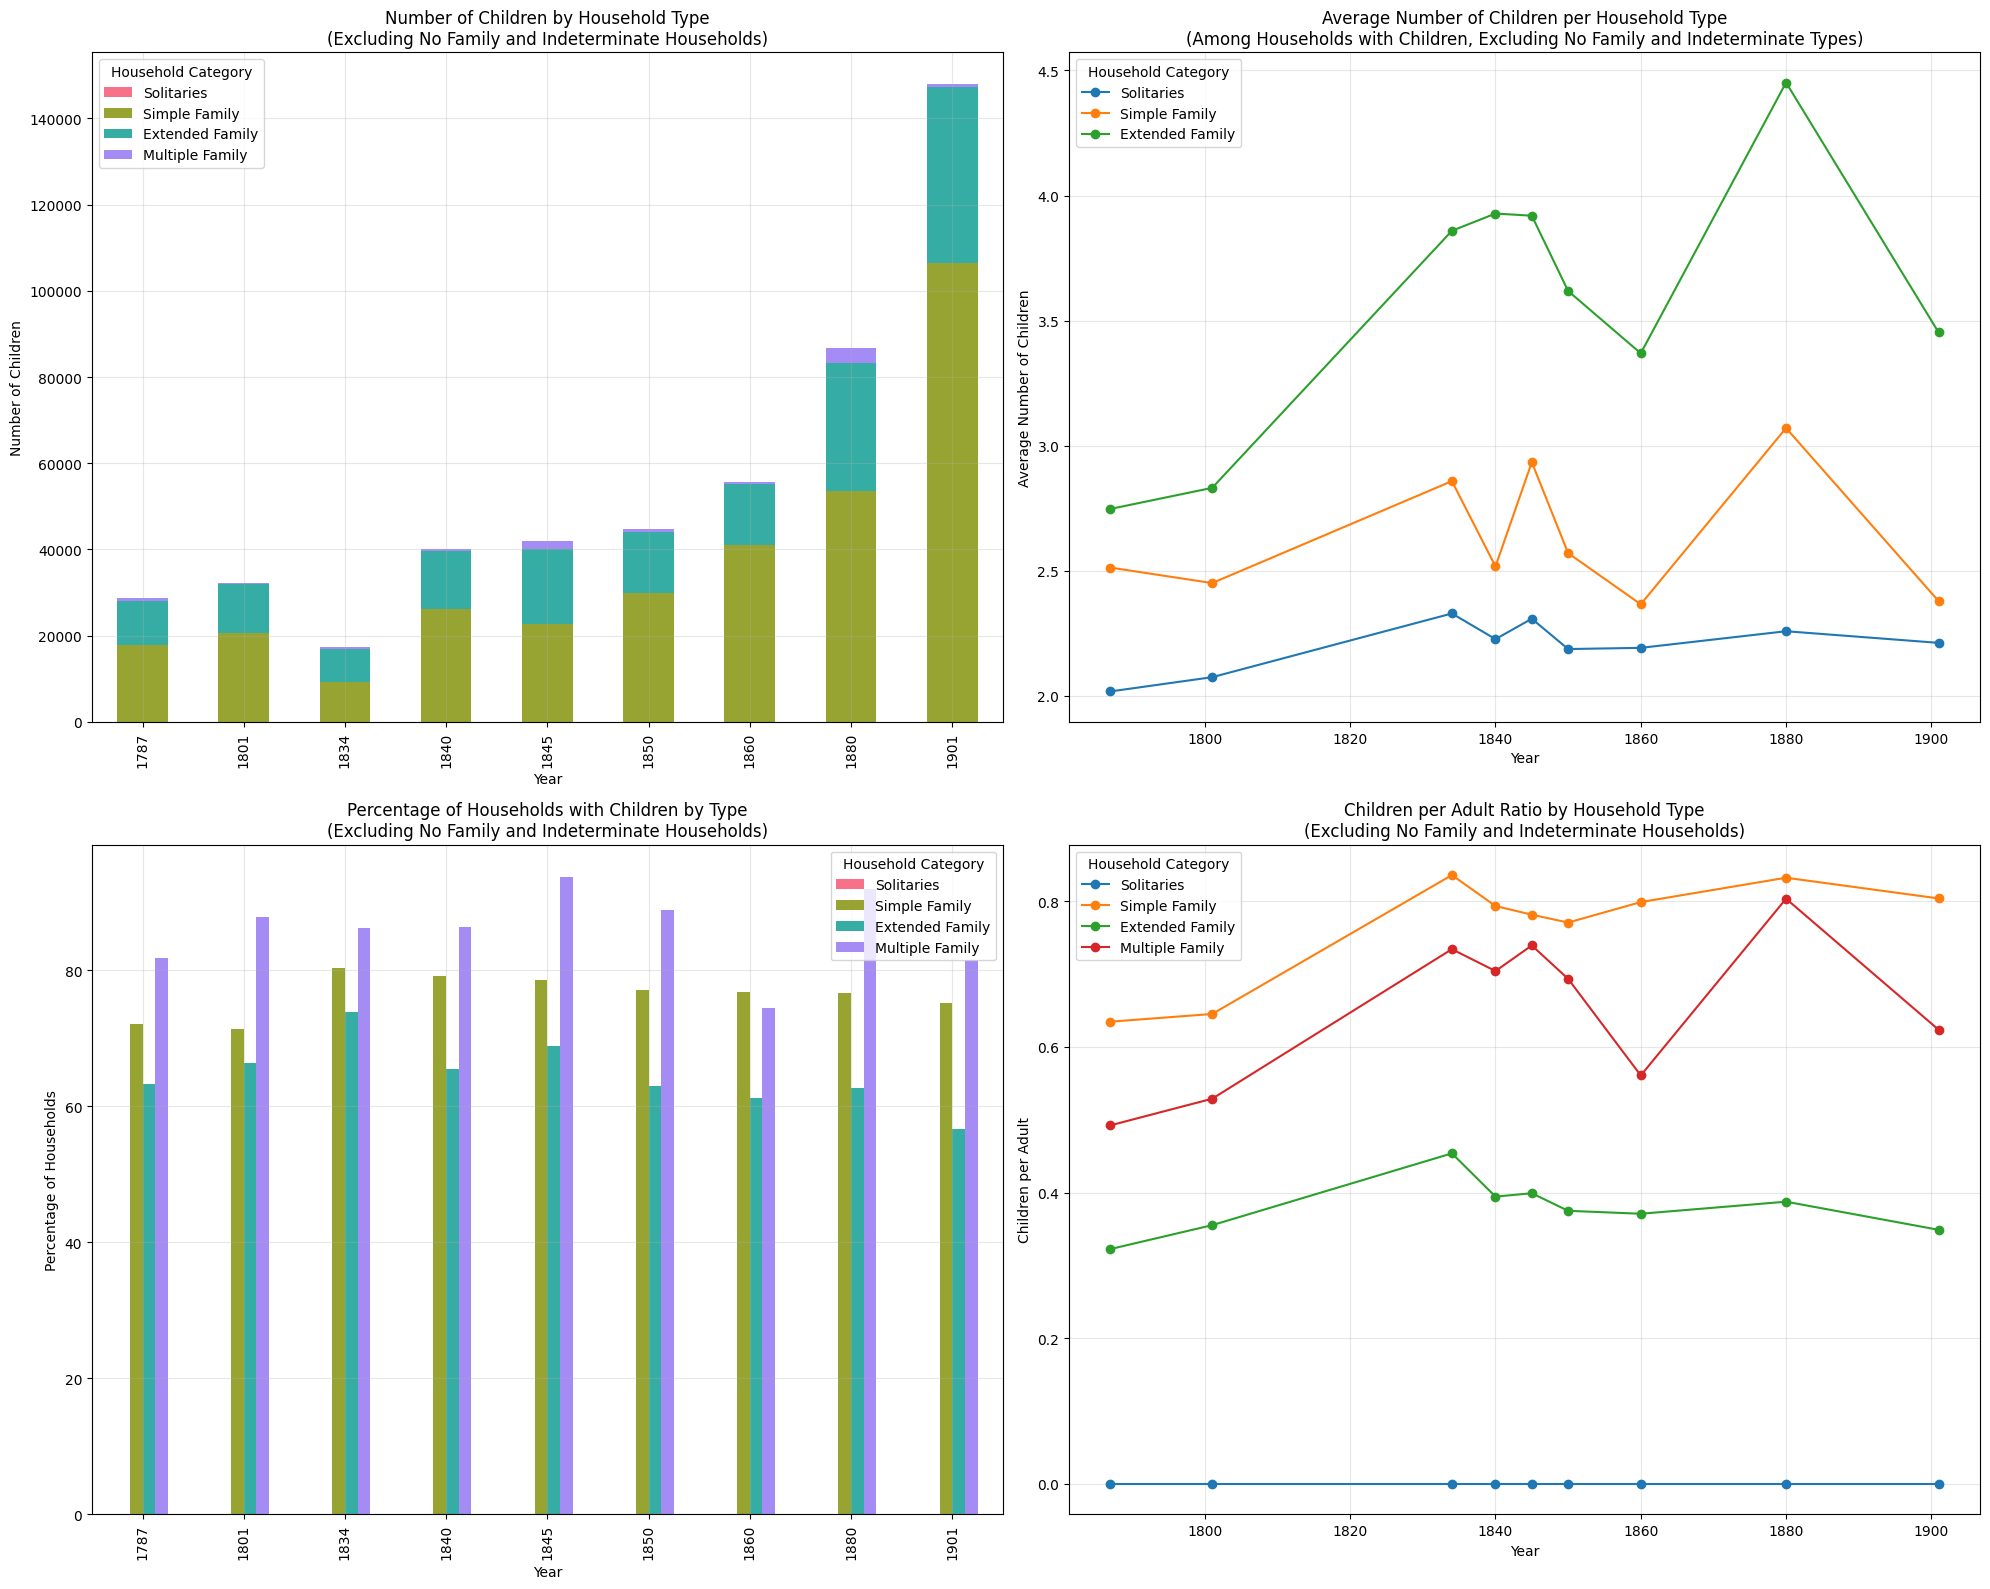


Summary Statistics for Copenhagen Households (Excluding No Family and Indeterminate Types):
--------------------------------------------------------------------------------

Year: 1787
Total households (in included categories): 20,218
Households with children: 13,148 (65.0%)
Total children: 28,698
Average children per household with children: 2.18

Children distribution by household type:
Simple Family: 17,903 children (62.4%)
Extended Family: 10,240 children (35.7%)
Multiple Family: 555 children (1.9%)

Year: 1801
Total households (in included categories): 23,361
Households with children: 14,630 (62.6%)
Total children: 32,162
Average children per household with children: 2.20

Children distribution by household type:
Simple Family: 20,613 children (64.1%)
Extended Family: 11,263 children (35.0%)
Multiple Family: 286 children (0.9%)

Year: 1834
Total households (in included categories): 9,655
Households with children: 6,800 (70.4%)
Total children: 17,464
Average children per household

In [8]:
from typing import Tuple, List, Dict, Optional
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def clean_household_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans and standardizes household data for analysis.
    
    Args:
        df: Raw census DataFrame
    
    Returns:
        Cleaned DataFrame with standardized values and handling of missing data
    """
    cleaned_df = df.copy()
    
    # Handle string columns - standardize missing values
    string_columns = ['household_position', 'marital_status', 'sex', 'event_county']
    for col in string_columns:
        if col in cleaned_df.columns:
            cleaned_df[col] = cleaned_df[col].fillna('unknown')
    
    # Convert age to numeric, replacing missing values with -1
    cleaned_df['age'] = pd.to_numeric(cleaned_df['age'], errors='coerce').fillna(-1)
    
    # Ensure critical columns aren't missing
    if cleaned_df['household_id'].isna().any() or cleaned_df['event_year'].isna().any():
        cleaned_df = cleaned_df.dropna(subset=['household_id', 'event_year'])
    
    return cleaned_df

def classify_household_with_children(household_df: pd.DataFrame) -> Dict[str, any]:
    """
    Classifies a household according to Laslett's categories with additional focus on children.
    
    Args:
        household_df: DataFrame containing members of a single household
    
    Returns:
        Dictionary containing household classification and children-related metrics
    """
    # Remove helpers/servants from main classification
    has_servants = household_df['household_position'].str.contains('tjeneste', 
                                                                 case=False, 
                                                                 na=False).any()
    core_household = household_df[~household_df['household_position'].str.contains(
        'tjeneste', case=False, na=False)]
    
    # Identify different household members
    children = core_household[core_household['age'] < 15]
    adults = core_household[core_household['age'] >= 15]
    married = adults['marital_status'].str.match('gift', case=False, na=False)
    widowed = adults['marital_status'].str.contains('enke', case=False, na=False)
    
    # Count key metrics
    n_children = len(children)
    n_adults = len(adults)
    n_married = married.sum()
    n_widowed = widowed.sum()
    
    # Identify household type
    if n_adults == 0:
        category = 6  # Indeterminate - shouldn't happen but handling edge case
        subcategory = 'orphanage'
    elif n_adults == 1:
        if n_children == 0:
            category = 1  # Solitary
            subcategory = 'widowed' if n_widowed == 1 else 'single'
        else:
            category = 3  # Simple family
            subcategory = 'single_parent'
    else:
        if n_married >= 2:
            # Check for extended family characteristics
            age_range = adults['age'].max() - adults['age'].min()
            if age_range >= 25 and n_adults >= 3:
                category = 4  # Extended family
                subcategory = 'multi_generational'
            elif n_married >= 4:
                category = 5  # Multiple family
                subcategory = 'multiple_couples'
            else:
                category = 3  # Simple family
                subcategory = 'nuclear_family'
        else:
            if n_children == 0:
                category = 2  # No family
                subcategory = 'cohabiting_adults'
            else:
                category = 3  # Simple family
                subcategory = 'other_with_children'
    
    # Calculate children-specific metrics
    child_age_stats = {
        'mean_child_age': children['age'].mean() if n_children > 0 else None,
        'min_child_age': children['age'].min() if n_children > 0 else None,
        'max_child_age': children['age'].max() if n_children > 0 else None
    }
    
    return {
        'category': category,
        'subcategory': subcategory,
        'n_children': n_children,
        'n_adults': n_adults,
        'has_servants': has_servants,
        'child_stats': child_age_stats,
        'household_size': len(core_household)
    }

def analyze_households_with_children(df: pd.DataFrame) -> pd.DataFrame:
    """
    Analyzes all households in a dataset with focus on children's presence and distribution.
    
    Args:
        df: Census DataFrame
    
    Returns:
        DataFrame containing detailed household classifications and children metrics
    """
    cleaned_df = clean_household_data(df)
    results = []
    
    for household_id, household_df in cleaned_df.groupby('household_id'):
        try:
            classification = classify_household_with_children(household_df)
            
            # Add identifying information
            classification.update({
                'household_id': household_id,
                'event_year': household_df['event_year'].iloc[0],
                'event_county': household_df['event_county'].iloc[0]
            })
            
            results.append(classification)
            
        except Exception as e:
            print(f"Error processing household {household_id}: {str(e)}")
            continue
    
    results_df = pd.DataFrame(results)
    
    # Add derived metrics
    results_df['has_children'] = results_df['n_children'] > 0
    results_df['children_per_adult'] = (results_df['n_children'] / 
                                      results_df['n_adults']).fillna(0)
    
    return results_df

def visualize_children_distribution(classified_df: pd.DataFrame) -> None:
    """
    Creates comprehensive visualizations of children's distribution across meaningful household types,
    excluding indeterminate (category 6) and no family (category 2) households.
    
    Args:
        classified_df: DataFrame containing household classifications and children metrics
    """
    # Filter out categories 2 and 6 before visualization
    relevant_categories = [1, 3, 4, 5]  # Keeping solitary, simple, extended, and multiple family households
    filtered_df = classified_df[classified_df['category'].isin(relevant_categories)]
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    
    # Use a color scheme that works well for our four categories
    colors = sns.color_palette("husl", 4)  # Reduced to 4 colors for our categories
    years = sorted(filtered_df['event_year'].unique())
    
    # Plot 1: Distribution of children across household types
    children_by_type = filtered_df.groupby(['event_year', 'category'])['n_children'].sum().unstack()
    children_by_type.plot(kind='bar', stacked=True, ax=ax1, color=colors)
    ax1.set_title('Number of Children by Household Type\n(Excluding No Family and Indeterminate Households)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of Children')
    
    # Plot 2: Average number of children per household type
    avg_children = (filtered_df[filtered_df['has_children']]
                   .groupby(['event_year', 'category'])['n_children']
                   .mean()
                   .unstack())
    avg_children.plot(kind='line', marker='o', ax=ax2)
    ax2.set_title('Average Number of Children per Household Type\n(Among Households with Children, Excluding No Family and Indeterminate Types)')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Number of Children')
    
    # Plot 3: Proportion of households with children by type
    prop_with_children = (filtered_df.groupby(['event_year', 'category'])['has_children']
                         .mean()
                         .unstack() * 100)
    prop_with_children.plot(kind='bar', ax=ax3, color=colors)
    ax3.set_title('Percentage of Households with Children by Type\n(Excluding No Family and Indeterminate Households)')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Percentage of Households')
    
    # Plot 4: Children per adult ratio by household type
    children_per_adult = (filtered_df.groupby(['event_year', 'category'])['children_per_adult']
                         .mean()
                         .unstack())
    children_per_adult.plot(kind='line', marker='o', ax=ax4)
    ax4.set_title('Children per Adult Ratio by Household Type\n(Excluding No Family and Indeterminate Households)')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Children per Adult')
    
    # Add consistent legends with the remaining categories
    category_labels = {
        1: 'Solitaries',
        3: 'Simple Family',
        4: 'Extended Family',
        5: 'Multiple Family'
    }
    
    for ax in [ax1, ax2, ax3, ax4]:
        handles = ax.get_lines() if len(ax.get_lines()) > 0 else ax.containers
        labels = [category_labels[cat] for cat in sorted(filtered_df['category'].unique())]
        ax.legend(title='Household Category', labels=labels)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def print_filtered_summary(classified_df: pd.DataFrame) -> None:
    """
    Prints summary statistics for household types, excluding no family and indeterminate categories.
    
    Args:
        classified_df: DataFrame containing household classifications and children metrics
    """
    relevant_categories = [1, 3, 4, 5]
    filtered_df = classified_df[classified_df['category'].isin(relevant_categories)]
    
    print("\nSummary Statistics for Copenhagen Households (Excluding No Family and Indeterminate Types):")
    print("-" * 80)
    
    category_labels = {
        1: 'Solitaries',
        3: 'Simple Family',
        4: 'Extended Family',
        5: 'Multiple Family'
    }
    
    for year in sorted(filtered_df['event_year'].unique()):
        year_data = filtered_df[filtered_df['event_year'] == year]
        
        print(f"\nYear: {year}")
        print(f"Total households (in included categories): {len(year_data):,}")
        print(f"Households with children: {year_data['has_children'].sum():,} "
              f"({year_data['has_children'].mean()*100:.1f}%)")
        print(f"Total children: {year_data['n_children'].sum():,}")
        print(f"Average children per household with children: "
              f"{year_data[year_data['has_children']]['n_children'].mean():.2f}")
        
        print("\nChildren distribution by household type:")
        type_distribution = (year_data.groupby('category')['n_children']
                           .sum()
                           .sort_values(ascending=False))
        total_children = type_distribution.sum()
        
        for category, count in type_distribution.items():
            if count > 0:
                print(f"{category_labels[category]}: {count:,} children "
                      f"({count/total_children*100:.1f}%)")

# Analyze Copenhagen data and create visualizations
copenhagen_households = analyze_households_with_children(ll_df_cph)
visualize_children_distribution(copenhagen_households)
print_filtered_summary(copenhagen_households)

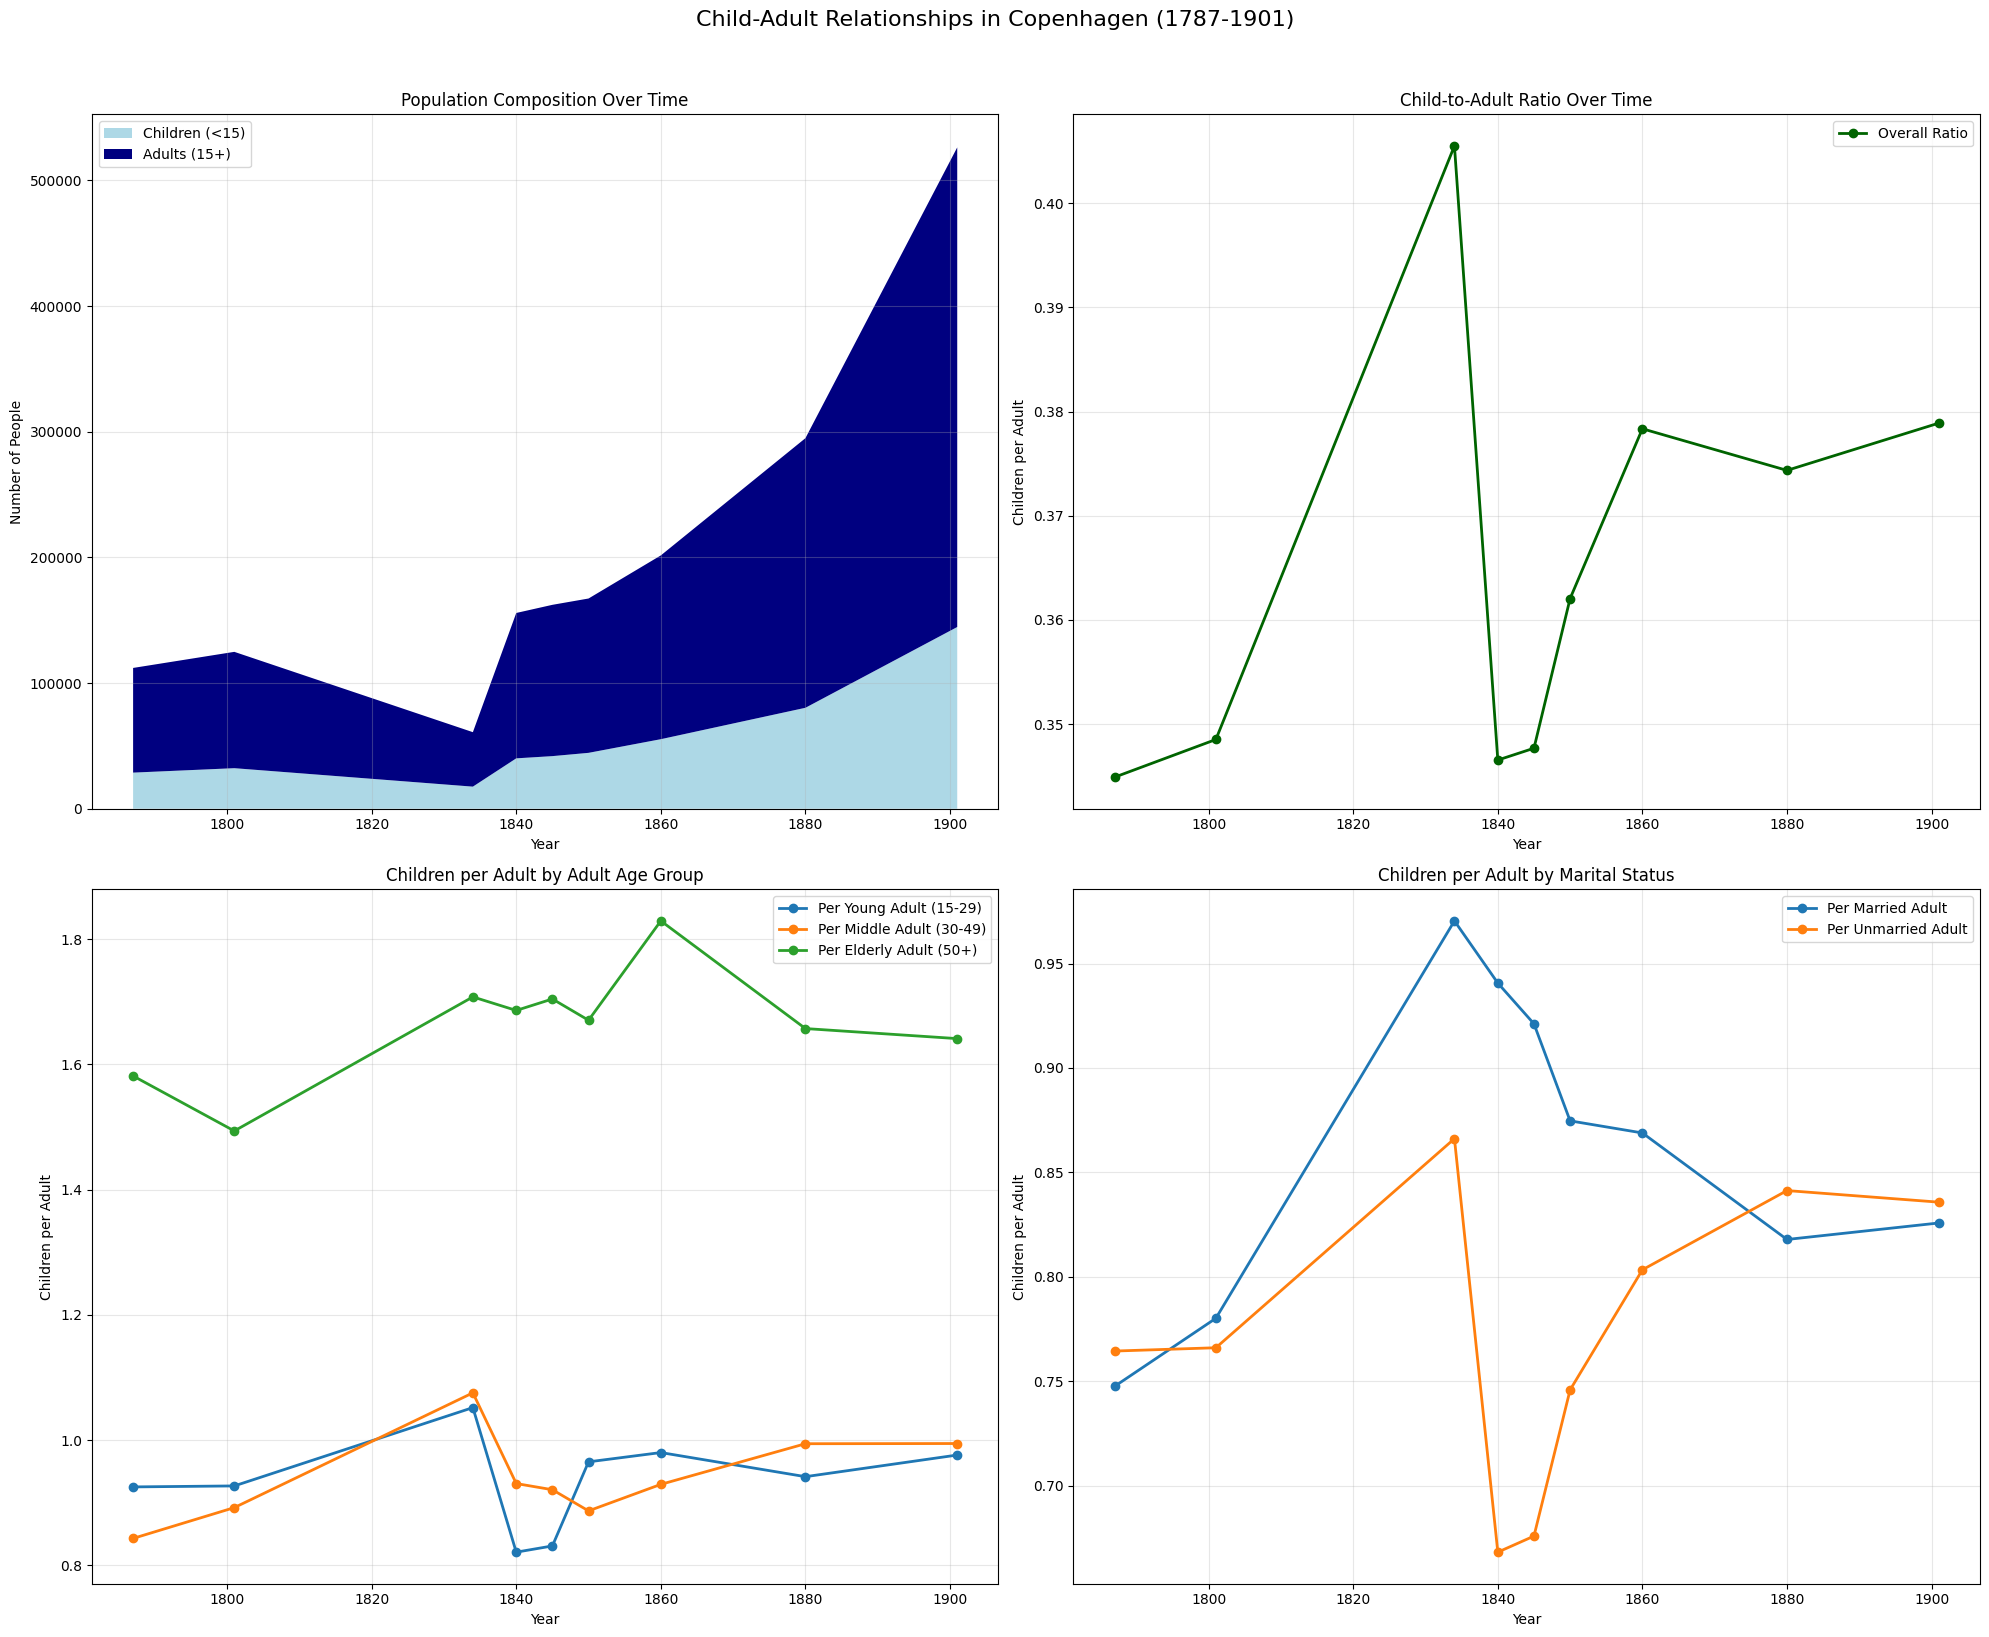


Child-Adult Ratio Analysis for Copenhagen:
--------------------------------------------------------------------------------

Year: 1787.0
Total Population: 112,320.0
Children (<15): 28,727.0 (25.6% of population)
Overall child-to-adult ratio: 0.34

Adult Age Groups:
Young Adults (15-29): 31,048.0 (0.93 children per young adult)
Middle Adults (30-49): 34,077.0 (0.84 children per middle adult)
Elderly Adults (50+): 18,164.0 (1.58 children per elderly adult)

Adult Marital Status:
Married Adults: 38,423.0 (0.75 children per married adult)
Unmarried Adults: 37,575.0 (0.76 children per unmarried adult)
Widowed Adults: 7,291.0

Year: 1801.0
Total Population: 125,014.0
Children (<15): 32,260.0 (25.8% of population)
Overall child-to-adult ratio: 0.35

Adult Age Groups:
Young Adults (15-29): 34,807.0 (0.93 children per young adult)
Middle Adults (30-49): 36,158.0 (0.89 children per middle adult)
Elderly Adults (50+): 21,597.0 (1.49 children per elderly adult)

Adult Marital Status:
Married Adu

In [9]:
from typing import Tuple, Dict, List
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_child_adult_ratios(df: pd.DataFrame) -> pd.DataFrame:
    """
    Calculates various ratios and statistics related to children and adults in the population.
    
    This function examines the relationship between children (age < 15) and adults 
    in different ways:
    1. Basic child-to-adult ratio
    2. Ratio by adult age groups (young, middle, elderly)
    3. Ratio by adult marital status
    
    Args:
        df: Census DataFrame containing individual-level data
        
    Returns:
        DataFrame containing yearly ratios and related statistics
    """
    # Create yearly snapshots for our analysis
    yearly_stats = []
    
    for year in sorted(df['event_year'].unique()):
        year_data: pd.DataFrame = df[df['event_year'] == year]
        
        # Identify children and adults
        children_mask = year_data['age'] < 15
        adults_mask = year_data['age'] >= 15
        
        # Basic counts
        n_children = children_mask.sum()
        n_adults = adults_mask.sum()
        
        # Adult age group analysis
        young_adults = year_data[
            (year_data['age'] >= 15) & (year_data['age'] < 30)
        ].shape[0]
        middle_adults = year_data[
            (year_data['age'] >= 30) & (year_data['age'] < 50)
        ].shape[0]
        elderly_adults = year_data[year_data['age'] >= 50].shape[0]
        
        # Adult marital status analysis
        married_adults = year_data[
            (adults_mask) & 
            (year_data['marital_status'].str.match('gift', 
                                                     case=False, 
                                                     na=False))
        ].shape[0]
        
        widowed_adults = year_data[
            (adults_mask) & 
            (year_data['marital_status'].str.contains('enke', 
                                                     case=False, 
                                                     na=False))
        ].shape[0]
        
        unmarried_adults = n_adults - married_adults - widowed_adults
        
        # Store results
        yearly_stats.append({
            'year': year,
            'total_population': len(year_data),
            'n_children': n_children,
            'n_adults': n_adults,
            'child_adult_ratio': n_children / n_adults if n_adults > 0 else 0,
            'children_population_pct': (n_children / len(year_data) * 100 
                                      if len(year_data) > 0 else 0),
            
            # Age group specific ratios
            'young_adults': young_adults,
            'middle_adults': middle_adults,
            'elderly_adults': elderly_adults,
            'children_per_young_adult': (n_children / young_adults 
                                       if young_adults > 0 else 0),
            'children_per_middle_adult': (n_children / middle_adults 
                                        if middle_adults > 0 else 0),
            'children_per_elderly_adult': (n_children / elderly_adults 
                                         if elderly_adults > 0 else 0),
            
            # Marital status specific ratios
            'married_adults': married_adults,
            'widowed_adults': widowed_adults,
            'unmarried_adults': unmarried_adults,
            'children_per_married_adult': (n_children / married_adults 
                                         if married_adults > 0 else 0),
            'children_per_unmarried_adult': (n_children / unmarried_adults 
                                           if unmarried_adults > 0 else 0)
        })
    
    return pd.DataFrame(yearly_stats)

def visualize_child_adult_ratios(ratio_df: pd.DataFrame) -> None:
    """
    Creates a comprehensive set of visualizations showing the relationships
    between children and adults in the population over time.
    
    Args:
        ratio_df: DataFrame containing the calculated child-adult ratios
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('Child-Adult Relationships in Copenhagen (1787-1901)', 
                fontsize=16, y=1.02)
    
    # Plot 1: Overall population composition
    ax1.stackplot(ratio_df['year'], 
                 [ratio_df['n_children'], ratio_df['n_adults']], 
                 labels=['Children (<15)', 'Adults (15+)'],
                 colors=['lightblue', 'navy'])
    ax1.set_title('Population Composition Over Time')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Number of People')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Plot 2: Child-to-Adult Ratios
    ax2.plot(ratio_df['year'], 
            ratio_df['child_adult_ratio'], 
            marker='o', 
            color='darkgreen',
            linewidth=2,
            label='Overall Ratio')
    ax2.set_title('Child-to-Adult Ratio Over Time')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Children per Adult')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Plot 3: Children per Adult by Adult Age Group
    age_group_ratios = ax3.plot(
        ratio_df['year'],
        ratio_df[['children_per_young_adult', 
                 'children_per_middle_adult',
                 'children_per_elderly_adult']],
        marker='o',
        linewidth=2
    )
    ax3.legend(age_group_ratios, 
              ['Per Young Adult (15-29)',
               'Per Middle Adult (30-49)',
               'Per Elderly Adult (50+)'])
    ax3.set_title('Children per Adult by Adult Age Group')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Children per Adult')
    ax3.grid(True, alpha=0.3)
    
    # Plot 4: Children per Adult by Adult Marital Status
    marital_ratios = ax4.plot(
        ratio_df['year'],
        ratio_df[['children_per_married_adult',
                 'children_per_unmarried_adult']],
        marker='o',
        linewidth=2
    )
    ax4.legend(marital_ratios, 
              ['Per Married Adult',
               'Per Unmarried Adult'])
    ax4.set_title('Children per Adult by Marital Status')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Children per Adult')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def print_ratio_summary(ratio_df: pd.DataFrame) -> None:
    """
    Prints a detailed summary of the child-adult ratio analysis.
    
    Args:
        ratio_df: DataFrame containing the calculated child-adult ratios
    """
    print("\nChild-Adult Ratio Analysis for Copenhagen:")
    print("-" * 80)
    
    for _, row in ratio_df.iterrows():
        year = row['year']
        print(f"\nYear: {year}")
        print(f"Total Population: {row['total_population']:,}")
        print(f"Children (<15): {row['n_children']:,} "
              f"({row['children_population_pct']:.1f}% of population)")
        print(f"Overall child-to-adult ratio: {row['child_adult_ratio']:.2f}")
        
        print("\nAdult Age Groups:")
        print(f"Young Adults (15-29): {row['young_adults']:,} "
              f"({row['children_per_young_adult']:.2f} children per young adult)")
        print(f"Middle Adults (30-49): {row['middle_adults']:,} "
              f"({row['children_per_middle_adult']:.2f} children per middle adult)")
        print(f"Elderly Adults (50+): {row['elderly_adults']:,} "
              f"({row['children_per_elderly_adult']:.2f} children per elderly adult)")
        
        print("\nAdult Marital Status:")
        print(f"Married Adults: {row['married_adults']:,} "
              f"({row['children_per_married_adult']:.2f} children per married adult)")
        print(f"Unmarried Adults: {row['unmarried_adults']:,} "
              f"({row['children_per_unmarried_adult']:.2f} children per unmarried adult)")
        print(f"Widowed Adults: {row['widowed_adults']:,}")

# Calculate ratios for Copenhagen
copenhagen_ratios = calculate_child_adult_ratios(ll_df_cph)

# Create visualizations and print summary
visualize_child_adult_ratios(copenhagen_ratios)
print_ratio_summary(copenhagen_ratios)